In [131]:
import pandas as pd
import numpy as np

In [132]:

# Load the dataset
file_path = r'C:\Users\mouni\Desktop\Projects\NLP project\DataGaza.xlsx'
df = pd.read_excel(file_path)


In [133]:
df

,title,content,Class
0,"Visiting Israel, US defense chief says he won’...",US Defense Secretary Lloyd Austin visited Tel ...,FAKE
1,Hamas releases propaganda video showing 3 elde...,The Hamas terror group published a propaganda ...,FAKE
2,President Herzog launches debt clemency scheme...,President Isaac Herzog and Justice Minister Ya...,FAKE
3,Amid reported plan to funnel PA money into Gaz...,Finance Minister Bezalel Smotrich warned on Mo...,FAKE
4,South Africa says its citizens serving in IDF ...,"JOHANNESBURG, South Africa — South Africans fi...",FAKE
...,...,...,...
3344,Inside Kfar Aza where Hamas militants killed f...,Warning: This article contains details that so...,REAL
3345,Judith and Natalie Raanan: Mother and daughter...,A mother and her teenager daughter from near C...,REAL
3346,Where do we go?' - Nowhere safe in Gaza as Isr...,"""Where do we go? Is there a safe place left in...",REAL
3347,"A lot of adrenaline, a lot of unknowns': Reser...",As Israel rushed onto a war footing on Saturda...,REAL


In [134]:
print(df['Class'].value_counts())


Class
REAL    1940
FAKE    1409
Name: count, dtype: int64


In [135]:
df['Class'] = df['Class'].replace({'FAKE': 1, 'REAL': 0})


In [136]:
df

,title,content,Class
0,"Visiting Israel, US defense chief says he won’...",US Defense Secretary Lloyd Austin visited Tel ...,1
1,Hamas releases propaganda video showing 3 elde...,The Hamas terror group published a propaganda ...,1
2,President Herzog launches debt clemency scheme...,President Isaac Herzog and Justice Minister Ya...,1
3,Amid reported plan to funnel PA money into Gaz...,Finance Minister Bezalel Smotrich warned on Mo...,1
4,South Africa says its citizens serving in IDF ...,"JOHANNESBURG, South Africa — South Africans fi...",1
...,...,...,...
3344,Inside Kfar Aza where Hamas militants killed f...,Warning: This article contains details that so...,0
3345,Judith and Natalie Raanan: Mother and daughter...,A mother and her teenager daughter from near C...,0
3346,Where do we go?' - Nowhere safe in Gaza as Isr...,"""Where do we go? Is there a safe place left in...",0
3347,"A lot of adrenaline, a lot of unknowns': Reser...",As Israel rushed onto a war footing on Saturda...,0


In [137]:
df.shape

(3349, 3)

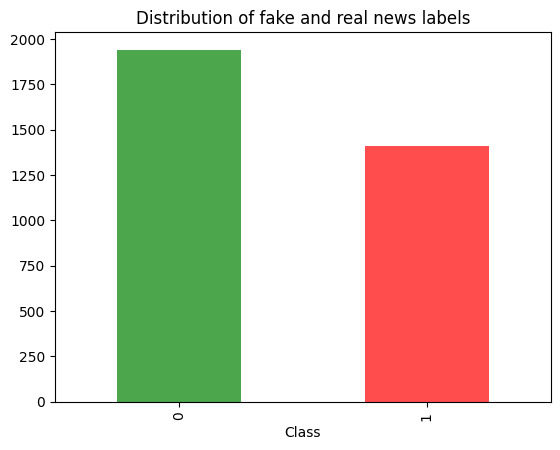

In [138]:
import matplotlib.pyplot as plt
df.Class.value_counts().plot(kind = 'bar', color = ['green','red'] , alpha=0.7)
plt.title("Distribution of fake and real news labels")
plt.show()

Missing DATA

In [139]:
df.isnull().sum()

title      0
content    1
Class      0
dtype: int64

In [140]:
df = df.dropna(subset=['content'])

# Step 2: Preprocessing

In [141]:
df['Full_text'] = df['title'] + df['content']
df

C:\Users\mouni\AppData\Local\Temp\ipykernel_9312\1063193004.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Full_text'] = df['title'] + df['content']


,title,content,Class,Full_text
0,"Visiting Israel, US defense chief says he won’...",US Defense Secretary Lloyd Austin visited Tel ...,1,"Visiting Israel, US defense chief says he won’..."
1,Hamas releases propaganda video showing 3 elde...,The Hamas terror group published a propaganda ...,1,Hamas releases propaganda video showing 3 elde...
2,President Herzog launches debt clemency scheme...,President Isaac Herzog and Justice Minister Ya...,1,President Herzog launches debt clemency scheme...
3,Amid reported plan to funnel PA money into Gaz...,Finance Minister Bezalel Smotrich warned on Mo...,1,Amid reported plan to funnel PA money into Gaz...
4,South Africa says its citizens serving in IDF ...,"JOHANNESBURG, South Africa — South Africans fi...",1,South Africa says its citizens serving in IDF ...
...,...,...,...,...
3344,Inside Kfar Aza where Hamas militants killed f...,Warning: This article contains details that so...,0,Inside Kfar Aza where Hamas militants killed f...
3345,Judith and Natalie Raanan: Mother and daughter...,A mother and her teenager daughter from near C...,0,Judith and Natalie Raanan: Mother and daughter...
3346,Where do we go?' - Nowhere safe in Gaza as Isr...,"""Where do we go? Is there a safe place left in...",0,Where do we go?' - Nowhere safe in Gaza as Isr...
3347,"A lot of adrenaline, a lot of unknowns': Reser...",As Israel rushed onto a war footing on Saturda...,0,"A lot of adrenaline, a lot of unknowns': Reser..."


In [142]:
print(df['Class'].unique())


[1 0]


### Fake news examples 

In [143]:
df[df.Class == 1].Full_text

0       Visiting Israel, US defense chief says he won’...
1       Hamas releases propaganda video showing 3 elde...
2       President Herzog launches debt clemency scheme...
3       Amid reported plan to funnel PA money into Gaz...
4       South Africa says its citizens serving in IDF ...
                              ...                        
3325    Welsh Parliament boss refuses to fly Israeli f...
3326    Israel-Gaza attacks: Four arrests made at Manc...
3335    Hamas Israel attacks: Hertfordshire village co...
3337    Israel hostage crisis is every government's wo...
3348    Growing backlash over Harvard students' pro-Pa...
Name: Full_text, Length: 1408, dtype: object

##  Real news examples

In [144]:
# Filter rows where 'Class' is equal to 1
filtered_df = df[df['Class'] == 0]

first_thousand_chars = filtered_df['Full_text'].iloc[0][:1000]
print(first_thousand_chars)

Suspected Islamist woman arrested for planting explosive device on Warsaw streetWARSAW, Poland — Polish authorities say that they have arrested and pressed charges against a 38-year-old Polish woman with Islamic extremist sympathies who planted an explosive device on a street in central Warsaw earlier this month. There were no injuries.Police said in a statement published on Monday that the woman placed the device in Warsaw on the night of November 10-11 and then took a train back to her home in western Poland.Nobody was hurt, but the device had the potential to injure many people, police said.“The makeshift explosive device filled with gas containers and nails could have caused a serious threat to the health and lives of many people,” the statement said. It added that she was charged with “causing danger and bringing danger to the life and health of many people, as well as preparation for causing such danger.”Police used CCTV footage to track her movements. After planting the device i

## CLEANING: Lowercasing + remove stop words + remove punctuation

In [145]:
import spacy
from spacy.lang.en import English
from nltk.corpus import stopwords
import nltk
import time

## download the dictionary for stopwords
nltk.download('stopwords')

## get the set of stopwords 
stop_words_set = set(stopwords.words('english'))

## Load English tokenizer from spacy
nlp = English()
tokenizer = nlp.tokenizer ## make instance 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mouni\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [146]:
import time
from string import punctuation

def optimized_preprocess(texts):
    result = []
    
    # Tokenize using spaCy's tokenizer
    for text in texts:
        tokens = [token.text.lower() for token in tokenizer(text) if (token.text.isalpha() or token.text.isdigit()) and token.text.lower() not in stop_words_set]
        result.append(" ".join(tokens))
    
    return result

# Process data
s = time.time()
preprocessed_texts = optimized_preprocess(df.Full_text)
print('Time to clean ', time.time() - s)



Time to clean  46.18896698951721


In [147]:
## Save a new column in the dataset
df['Full_text_cleaned'] = preprocessed_texts
## Check cleaned text 
print(df.Full_text_cleaned.head())

0    visiting israel us defense chief says wo dicta...
1    hamas releases propaganda video showing 3 elde...
2    president herzog launches debt clemency scheme...
3    amid reported plan funnel pa money gaza smotri...
4    south africa says citizens serving idf could f...
Name: Full_text_cleaned, dtype: object


C:\Users\mouni\AppData\Local\Temp\ipykernel_9312\2407859110.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Full_text_cleaned'] = preprocessed_texts


In [148]:
## Read some in full
print(df.Full_text_cleaned[697][0:1000])

hamas releases 13 israeli four thai captives hours long delayhamas handed 13 israeli captives four thai nationals international committee red cross icrc delay seven hours group claimed israel violated terms truce impasse resolved following mediation qatar egypt saturday second day pause hostilities israel palestinian conflict israel released second batch 39 palestinians six women 33 children two prisons palestinian news agency wafa said saturday third phase exchange israeli captives palestinian prisoners truce deal expected later sunday ghazi hamad member hamas political bureau told al jazeera group committed four day truce agreement willing release captives exchange release palestinian prisoners majed al ansari spokesperson qatar ministry foreign affairs said post x 13 israelis four foreign nationals handed icrc way rafah border crossing southern gaza egypt travelling israel 17 captives arrived israel israeli army posted undergoing initial medical assessment continue accompanied idf i

## Explore some differences between real and fake texts

### Comparing choice of vocabulary

In [149]:
from collections import Counter ## for counting words 

## Get real and fake subsets 
fake_text = df[df.Class == 1]["Full_text_cleaned"]
real_text = df[df.Class == 0]["Full_text_cleaned"]

In [150]:
fake_text

0       visiting israel us defense chief says wo dicta...
1       hamas releases propaganda video showing 3 elde...
2       president herzog launches debt clemency scheme...
3       amid reported plan funnel pa money gaza smotri...
4       south africa says citizens serving idf could f...
                              ...                        
3325    welsh parliament boss refuses fly israeli flag...
3326    israel gaza attacks four arrests made manchest...
3335    hamas israel attacks hertfordshire village com...
3337    israel hostage crisis every government worst n...
3348    growing backlash harvard students pro palestin...
Name: Full_text_cleaned, Length: 1408, dtype: object

In [151]:
## A set is a data structure that contains only unique elements, so this operation removes any duplicate words from the list 
vocab_set = set((" ".join(df.Full_text_cleaned)).split())
non_unique_set = (" ".join(df.Full_text_cleaned)).split()

unique word in your vocabulary appears about 18.46 times in your corpus

In [152]:
## Get sizes of vocab, entire corpus, ratio 
print('Vocab size : ', len(vocab_set))# 22,778 different words that are not repeated
print('Entire word count : ', len(non_unique_set))# the total number of words in your entire corpus, including repeated words
print('Ratio of word count to vocab size : ',len(non_unique_set)/len(vocab_set) )
# How many times, on average, each word in your vocabulary is used in your entire corpus.

Vocab size :  38721
Entire word count :  1260160
Ratio of word count to vocab size :  32.544614033728465


In [153]:
print(fake_text.head())
print(real_text.head())

0    visiting israel us defense chief says wo dicta...
1    hamas releases propaganda video showing 3 elde...
2    president herzog launches debt clemency scheme...
3    amid reported plan funnel pa money gaza smotri...
4    south africa says citizens serving idf could f...
Name: Full_text_cleaned, dtype: object
543    suspected islamist woman arrested planting exp...
544    ben gvir warns disaster hostage deal slams idi...
546    culture minister seeks revoke citizenship socc...
547    musk x sues liberal advocacy group report ads ...
549    boats said set leave turkey gaza waters new fr...
Name: Full_text_cleaned, dtype: object


In [154]:
## COUNT THE WORDS

## First, turn a list of lists into just one list -- i.e. join all documents together into
## one giant document/ string
fake_text_giant_string = " ".join(fake_text)
print(len(fake_text_giant_string))
real_text_giant_string = " ".join(real_text)
print(len(real_text_giant_string))


4114079
5118102


In [155]:
## Now, update to the Counter object to begin counting
## Rmb to split to only feed words
fake_words_counter = Counter(fake_text_giant_string.split())
real_words_counter = Counter(real_text_giant_string.split())


In [156]:
fake_words_counter

Counter({'israel': 9998,
         'hamas': 8568,
         'gaza': 8432,
         'said': 8347,
         'israeli': 4629,
         'war': 3631,
         'people': 3250,
         'palestinian': 3082,
         'hostages': 3081,
         'october': 2753,
         'us': 2647,
         'killed': 2425,
         '7': 2336,
         'also': 2266,
         'military': 1818,
         'idf': 1787,
         'would': 1719,
         'since': 1718,
         'one': 1696,
         'strip': 1687,
         'group': 1675,
         'two': 1670,
         'civilians': 1626,
         'minister': 1545,
         'security': 1435,
         'attack': 1392,
         'terrorists': 1379,
         'terror': 1375,
         'told': 1368,
         '2023': 1332,
         'children': 1324,
         'border': 1301,
         'palestinians': 1274,
         'netanyahu': 1230,
         'released': 1219,
         'day': 1218,
         'including': 1179,
         'held': 1177,
         'attacks': 1163,
         'according': 1115,

In [157]:
real_words_counter

Counter({'israel': 12407,
         'said': 11962,
         'gaza': 11760,
         'hamas': 8135,
         'israeli': 6699,
         'people': 5249,
         'palestinian': 4604,
         'war': 4035,
         'killed': 3210,
         'us': 3169,
         'also': 2896,
         'al': 2587,
         'would': 2323,
         'palestinians': 2244,
         'one': 2184,
         'october': 2173,
         'since': 2121,
         'told': 2114,
         'hospital': 2071,
         'military': 2034,
         'attack': 1955,
         'two': 1885,
         'children': 1857,
         'hostages': 1837,
         'minister': 1752,
         '7': 1707,
         'civilians': 1668,
         'attacks': 1651,
         'humanitarian': 1640,
         'strip': 1614,
         'including': 1533,
         'government': 1524,
         'group': 1516,
         'ceasefire': 1516,
         'according': 1499,
         'day': 1377,
         'conflict': 1367,
         'forces': 1315,
         'says': 1315,
         'aid'

In [158]:

print(fake_words_counter.most_common(10)) ## Most common words for fake news

[('israel', 9998), ('hamas', 8568), ('gaza', 8432), ('said', 8347), ('israeli', 4629), ('war', 3631), ('people', 3250), ('palestinian', 3082), ('hostages', 3081), ('october', 2753)]


In [159]:
print(real_words_counter.most_common(10)) ## Most common words for real news

[('israel', 12407), ('said', 11962), ('gaza', 11760), ('hamas', 8135), ('israeli', 6699), ('people', 5249), ('palestinian', 4604), ('war', 4035), ('killed', 3210), ('us', 3169)]


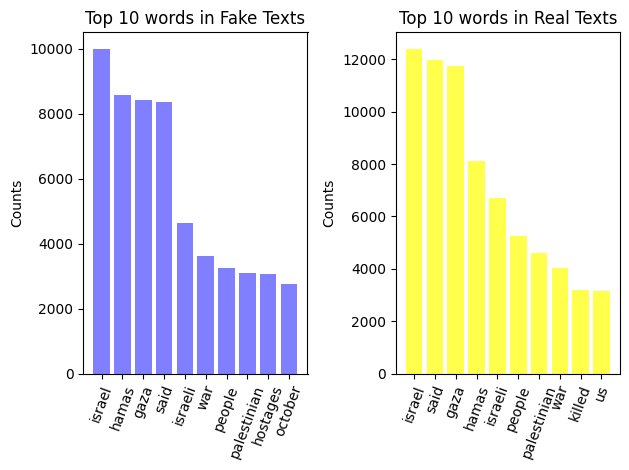

In [160]:
## Visualise the top words 

fake_top_10 = fake_words_counter.most_common(10)
x,y = zip(*fake_top_10)

true_top_10 = real_words_counter.most_common(10)
x2,y2 = zip(*true_top_10)

## Plot
# Plotting fake data
plt.subplot(1, 2, 1)  # (nrows, ncols, index)
plt.bar(x, y, color='blue', alpha=0.5)
plt.title('Top 10 words in Fake Texts')
plt.xticks(rotation=70)
plt.ylabel('Counts')

# Plotting real data
plt.subplot(1, 2, 2)
plt.bar(x2, y2, color='yellow', alpha=0.7)
plt.title('Top 10 words in Real Texts')
plt.xticks(rotation=70)
plt.ylabel('Counts')

plt.tight_layout()
plt.show()

### Word clouds

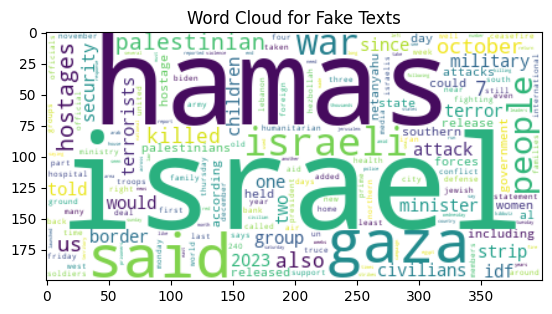

In [161]:
from wordcloud import WordCloud

fake_WC = WordCloud(background_color = 'white').generate_from_frequencies(fake_words_counter)

plt.imshow(fake_WC, interpolation = 'bilinear')
plt.title('Word Cloud for Fake Texts')
plt.show()

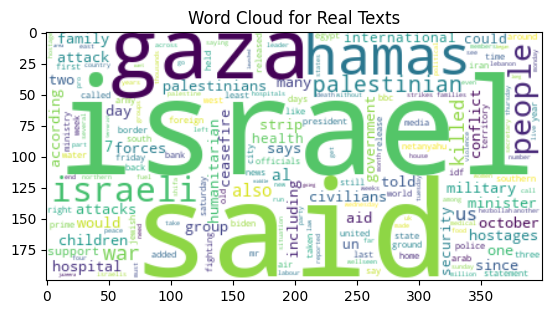

In [162]:
real_WC = WordCloud(background_color = 'white').generate_from_frequencies(real_words_counter)

plt.imshow(real_WC, interpolation = 'bilinear')
plt.title('Word Cloud for Real Texts')
plt.show()

In [163]:
fake_lengths = fake_text.str.split().apply(len)
print(fake_lengths)

0       1077
1        586
2        291
3        513
4        254
        ... 
3325     284
3326     165
3335     291
3337     561
3348     338
Name: Full_text_cleaned, Length: 1408, dtype: int64


In [164]:
real_lengths = real_text.str.split().apply(len)
print(real_lengths)

543     166
544     557
546     466
547     471
549     651
       ... 
3343    337
3344    656
3345    197
3346    439
3347    622
Name: Full_text_cleaned, Length: 1940, dtype: int64


### Visualise differences in length -- are real text longer or shorter?

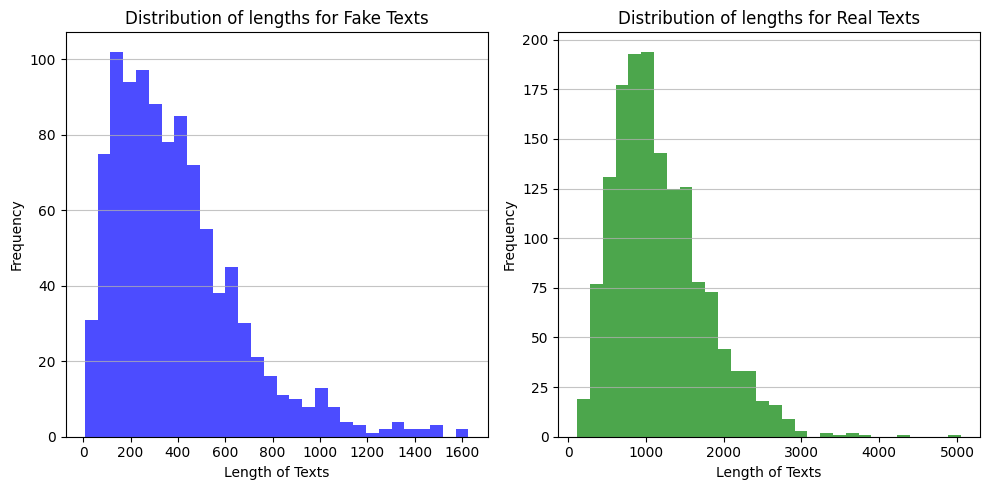

In [165]:
# Fake texts data simulation
np.random.seed(0)  # Seed for reproducibility
fake_lengths = np.random.gamma(shape=2., scale=200., size=1000)

# Real texts data simulation
real_lengths = np.random.gamma(shape=4., scale=300., size=1500)

# Plotting both histograms
plt.figure(figsize=(10, 5))

# Fake Texts Histogram
plt.subplot(1, 2, 1)
plt.hist(fake_lengths, bins=30, color='blue', alpha=0.7)
plt.title('Distribution of lengths for Fake Texts')
plt.xlabel('Length of Texts')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

# Real Texts Histogram
plt.subplot(1, 2, 2)
plt.hist(real_lengths, bins=30, color='green', alpha=0.7)
plt.title('Distribution of lengths for Real Texts')
plt.xlabel('Length of Texts')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

# Display the plots
plt.tight_layout()
plt.show()

# When comparing both histograms, it seems that fake texts are generally shorter than real texts.

# Feature engineering: Bags of Words model

NLP models cannot take in raw text, as machine learning models only understand numbers and vectors. To feed our real and fake news data into a model, we must first convert the text into something vectorial, and one option is the **BOW** model. 

The **BoW** model treats text as an unordered set of words, where the sequence doesn't matter. We can already see how this is an obvious limitation, but this can be the first way forward. 

The first thing BoW does it to **create a vocabulary of all the words**. This will essentially become our predictors, i.e. each word is a predictor or a feature (e.g. such as how education, age, industry are predictors for wage prediction). In this case, each document is a sample, as will be represented by a vector whose length is equal to the size of the vocabulary. Each entry corresponds to the number of words in for that unique word predictor of the particular document -- i.e. the i,j-th entry corresponds to the frequency of the jth word for the ith document. 

## Transforming text to BoW -- Count Vectoriser 

In [166]:
from sklearn.feature_extraction.text import CountVectorizer

## Instantiate vectorizer 
vectoriser = CountVectorizer()

In [167]:
## Save text
preprocessed_text = df.Full_text_cleaned

## Apply vectoriser to get the bag of words matrix
X = vectoriser.fit_transform(preprocessed_text)

In [168]:
## Check outcome
#print(X)

## Shape
print(X.shape)

(3348, 38686)


In [169]:
bow_df = pd.DataFrame(X.toarray(), columns=vectoriser.get_feature_names_out())
bow_df

,004,0115,0300,0330,04,0410,05,0500,061962,0700,...,يعينه,يقوم,يلي,ينشر,يوم,يونس,アイドル,ﺍﻟﻤﻮﺍﺩ,ﺍﻻﺳﺘﺨﺪﺍﻡ,ﺫﺍﺕ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3343,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3344,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3345,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3346,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [170]:
## Re-instantiate with all the new parameters
vectoriser = CountVectorizer(min_df = 600, ## a word must appear in at least 200 documents (text entries) to be included
                            max_df = 0.90, ## is a word appears in 90% or more of documents, then ignore, since it may be too common
                            stop_words = 'english', ## use stopwords again, although we had used it from spacy already
                            max_features = 1000)


## Now, reapply vectoriser
X = vectoriser.fit_transform(preprocessed_text) ## use only 10000 most common words


In [171]:
bow_df = pd.DataFrame(X.toarray(), columns=vectoriser.get_feature_names_out())
bow_df

,2023,240,according,added,aid,air,al,amid,arab,area,...,water,way,wednesday,week,weeks,west,women,world,year,years
0,5,1,2,2,5,1,0,0,0,0,...,0,4,0,1,2,3,1,3,0,0
1,2,2,2,0,1,1,2,0,0,0,...,0,0,0,2,0,0,4,1,1,1
2,1,1,1,1,0,0,0,2,0,0,...,0,1,0,0,0,0,1,0,0,0
3,2,1,0,1,5,0,0,1,0,0,...,0,1,0,0,1,2,0,0,0,0
4,1,1,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3343,0,0,0,0,0,3,0,0,0,1,...,0,2,0,0,0,0,0,1,0,0
3344,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3345,0,0,1,1,0,3,3,0,0,1,...,2,0,0,0,0,0,0,0,0,1
3346,0,0,0,0,0,1,1,0,0,0,...,0,1,0,0,2,0,0,0,4,2


In [172]:
print(X[0:100,0:100])

  (0, 33)	19
  (0, 91)	4
  (0, 89)	9
  (0, 15)	2
  (0, 96)	9
  (0, 53)	18
  (0, 18)	2
  (0, 62)	5
  (0, 4)	5
  (0, 67)	7
  (0, 47)	24
  (0, 32)	4
  (0, 28)	5
  (0, 49)	1
  (0, 13)	3
  (0, 29)	2
  (0, 51)	2
  (0, 97)	1
  (0, 12)	5
  (0, 73)	2
  (0, 66)	4
  (0, 17)	2
  (0, 83)	1
  (0, 27)	2
  (0, 95)	3
  :	:
  (99, 65)	1
  (99, 64)	1
  (99, 87)	1
  (99, 0)	1
  (99, 25)	2
  (99, 71)	3
  (99, 2)	2
  (99, 24)	1
  (99, 68)	4
  (99, 78)	2
  (99, 34)	1
  (99, 42)	2
  (99, 1)	1
  (99, 54)	1
  (99, 90)	1
  (99, 70)	3
  (99, 69)	1
  (99, 56)	1
  (99, 38)	1
  (99, 44)	1
  (99, 63)	1
  (99, 11)	1
  (99, 7)	1
  (99, 52)	2
  (99, 45)	4


## Visualising count vectorised data -- BoW

In [173]:
print(type(vectoriser.vocabulary_))
print(len(vectoriser.vocabulary_))

<class 'dict'>
168


In [174]:
countvect_df = pd.DataFrame(vectoriser.vocabulary_.items(), ## extract out the items from the dictionary so that we can turn it into a pandas dataframe
                           columns = ['word', 'count'])

print(countvect_df.sort_values('count', ascending = False))

          word  count
116      years    167
110       year    166
84       world    165
65       women    164
24        west    163
..         ...    ...
12         aid      4
72       added      3
67   according      2
98         240      1
48        2023      0

[168 rows x 2 columns]


In [175]:
countvect_df 

,word,count
0,defense,33
1,says,126
2,secretary,127
3,monday,91
4,prime,114
...,...,...
163,political,112
164,middle,86
165,wednesday,160
166,terrorist,144


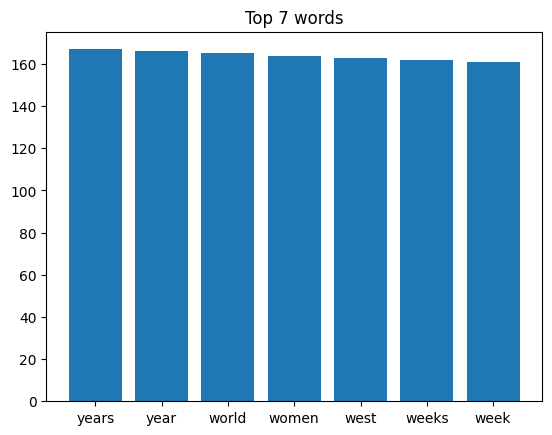

In [176]:
## Get top ten words to visualise 
n = 7
top_words_from_countvec = countvect_df.sort_values('count', ascending = False).head(n)

## Plot
plt.bar(top_words_from_countvec['word'], top_words_from_countvec['count'])
plt.title("Top 7 words")
plt.show()

## Train test split

Use 80-20 train test split

In [177]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import joblib

y = df['Class']  # is the column with fake/real labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [178]:
## Check dimensions

print('Train set ', X_train.shape)
print('Test set ', X_test.shape)

Train set  (2678, 168)
Test set  (670, 168)


## BOW 1: Logistic regression 

In [179]:
## TRAIN
from sklearn.linear_model import LogisticRegression

s = time.time()
log_clf = LogisticRegression(max_iter=1000)  # Increased max_iter for convergence
log_clf.fit(X_train, y_train)
time_for_logreg = time.time() - s
print("Time to fit logistic regression :", time_for_logreg )

Time to fit logistic regression : 0.4595925807952881


In [180]:
## Evaluate 

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred_log = log_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_log)
print(classification_report(y_test, y_pred_log))
print(accuracy)

              precision    recall  f1-score   support

           0       0.71      0.85      0.77       384
           1       0.73      0.54      0.62       286

    accuracy                           0.72       670
   macro avg       0.72      0.69      0.70       670
weighted avg       0.72      0.72      0.71       670

0.7164179104477612


Text(50.722222222222214, 0.5, 'Real Labels')

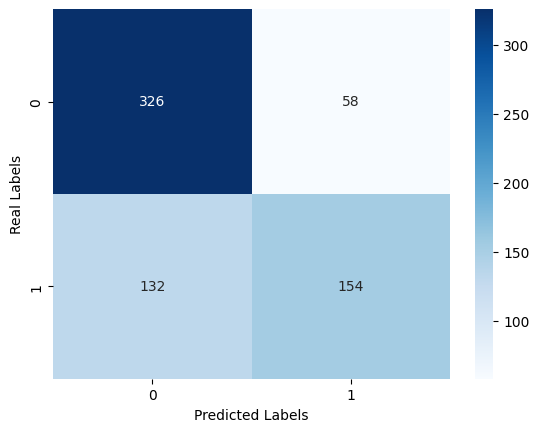

In [181]:
import seaborn as sns

## Evaluate with Confusion Matrix

sns.heatmap(confusion_matrix(y_test,y_pred_log), annot=True, 
            fmt='', cmap='Blues')

plt.xlabel('Predicted Labels')
plt.ylabel('Real Labels')

## BOW2: SVM 

SVM may be good for high dimensionality data, such as text that we are working on, with 10000 predictors. In such cases we use linear kernels, and it is interesting to see if it gives similar results to Logistic regression. 

In [182]:
from sklearn.svm import LinearSVC

linear_svc_clf = LinearSVC(max_iter = 10000) ##increase max iter to 100k for convergence
s = time.time()
linear_svc_clf.fit(X_train, y_train)
time_for_linear_svm = time.time() - s
print("Time to fit SVM :", time_for_linear_svm)

c:\Users\mouni\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Time to fit SVM : 19.42882013320923


c:\Users\mouni\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [183]:
## Evaluate 
y_pred_svc = linear_svc_clf.predict(X_test)
print(classification_report(y_test, y_pred_svc))
accuracy = accuracy_score(y_test, y_pred_svc)
print(accuracy)


              precision    recall  f1-score   support

           0       0.72      0.87      0.79       384
           1       0.75      0.54      0.63       286

    accuracy                           0.73       670
   macro avg       0.74      0.70      0.71       670
weighted avg       0.73      0.73      0.72       670

0.7283582089552239


Text(50.722222222222214, 0.5, 'Real Labels')

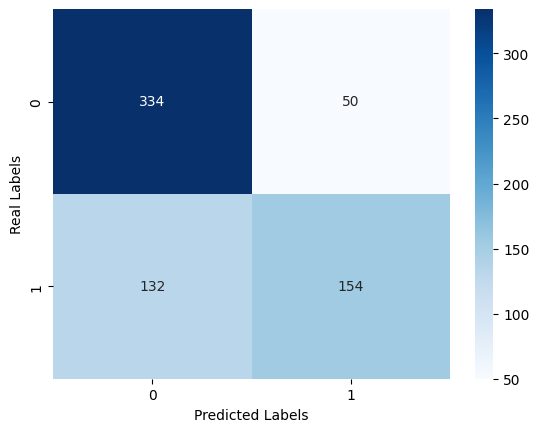

In [184]:
## Evaluate with Confusion Matrix

sns.heatmap(confusion_matrix(y_test,y_pred_svc), annot=True, 
            fmt='', cmap='Blues')

plt.xlabel('Predicted Labels')
plt.ylabel('Real Labels')

********This could mean logistic regression is more conservative in predicting class 1, while SVM is slightly more prone to predict class 1, which leads to more false positives and fewer true negatives.******

## BOW3: Random forests

In [185]:
# Create a Random Forest Classifier with 100 trees

# This specifies that the random forest should consist of 100 individual decision trees. 
# Each tree will be trained on a random subset of the data and features, 
# and their predictions will be averaged to produce the final output of the random forest.
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
# Train the model on the training data
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [186]:
y_pred = rf_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))
print(accuracy)



              precision    recall  f1-score   support

           0       0.72      0.92      0.81       384
           1       0.83      0.51      0.63       286

    accuracy                           0.75       670
   macro avg       0.78      0.72      0.72       670
weighted avg       0.77      0.75      0.73       670

0.7477611940298508


Text(50.722222222222214, 0.5, 'Real Labels')

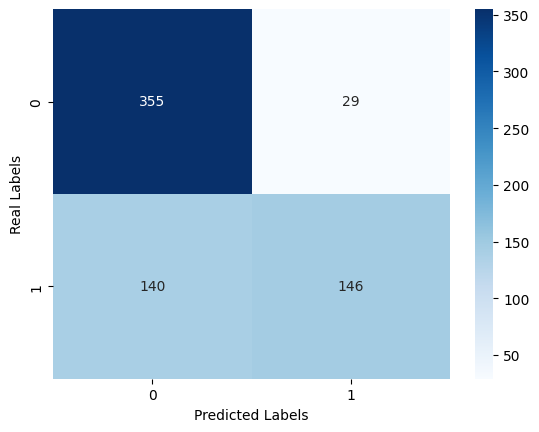

In [187]:
## Evaluate with Confusion Matrix

sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, 
            fmt='', cmap='Blues')

plt.xlabel('Predicted Labels')
plt.ylabel('Real Labels')

In [188]:
# # Save the model to a file (you can change the filename as needed)
model_filename = 'random_forest_model.pkl'
joblib.dump(rf_classifier, model_filename)


['random_forest_model.pkl']

In [189]:
import streamlit as st
import joblib

# Load the saved Random Forest model
model = joblib.load('random_forest_model.pkl')

In [190]:
# Save the vectoriser to a file
vectoriser_filename = 'vectoriser.pkl'
joblib.dump(vectoriser, vectoriser_filename)
# Load the vectoriser from the file
vectoriser = joblib.load('vectoriser.pkl')


Logistic Regression performs relatively well in terms of both precision and recall for class 1, suggesting it has a balanced approach to predicting both classes.


SVM has slightly lower precision and recall than logistic regression, indicating it might not be as effective at classifying class 1.

Random Forest, despite having the highest overall accuracy, has very poor performance on class 1, with the lowest precision, recall, and F1 score, suggesting that it is heavily biased towards class 0. This could be due to class imbalance or other factors that could be addressed with hyperparameter tuning or data preprocessing.

## BOW 3.1: Tuned RF

There are many hyperparameters to be tuned with random forests.

We will use random search (cross validation) instead of gridsearch, which may be faster and more efficient. This is done by randomly selecting points in the hyperparameter space, instead of using all of them. 

In [191]:
from sklearn.model_selection import RandomizedSearchCV

random search is usually faster and more efficient for hyperparameter tuning when the hyperparameter space is large, 

while grid search is more methodical and exhaustive for smaller spaces.

In [192]:
## Set up hyperparameter space 

param_grid = {
    'n_estimators' : [50, 150, 300, 450],
    'max_depth': [None, 10, 20, 40],
    'max_features': ['sqrt', 'log2'] 
}

In [193]:
## Reinstantiate
rf = RandomForestClassifier(random_state = 42)

## Fit the random search object (i.e. start fitting rfs) and find the best model
s = time.time()

## init the RandomizedSearchCV object as random_search, stating the grid of params to test
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, 
                                   n_iter=10, ## number of parameter settings being sampled (number of combinations being tried)
                                   cv=3, n_jobs=-1, verbose=2, random_state=42)
## fit the random search object 
random_search.fit(X_train, y_train)
time_for_rf_2_hypertun = time.time() - s
print("Time for hyperparameter tuning via random search CV ", time_for_rf_2_hypertun)
best_rf = random_search.best_estimator_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


Time for hyperparameter tuning via random search CV  92.20266461372375


In [194]:
y_pred_rf2 = best_rf.predict(X_test)
print("Random Forest Results")
print(classification_report(y_test, y_pred_rf2))

accuracy = accuracy_score(y_test,y_pred_rf2)
print(accuracy)


Random Forest Results
              precision    recall  f1-score   support

           0       0.72      0.96      0.82       384
           1       0.90      0.49      0.64       286

    accuracy                           0.76       670
   macro avg       0.81      0.73      0.73       670
weighted avg       0.80      0.76      0.74       670

0.7611940298507462


Text(50.722222222222214, 0.5, 'Real Labels')

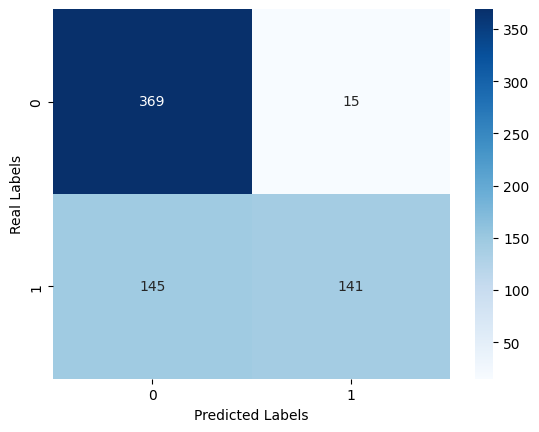

In [195]:
## Evaluate with Confusion Matrix

sns.heatmap(confusion_matrix(y_test,y_pred_rf2), annot=True, 
            fmt='', cmap='Blues')

plt.xlabel('Predicted Labels')
plt.ylabel('Real Labels')

Save the model

In [196]:
# import joblib

# # Save the trained model to a file
# model_filename = "random_forest2_model.pkl"
# joblib.dump(best_rf, model_filename)

# # Now, your model is saved in the file "random_forest_model.pkl"
# # Load the trained model from the file
# loaded_model = joblib.load("random_forest2_model.pkl")

In [197]:
## For fair comparison, we want to also know the time taken to fit this new 'ideal' rf

# save tuned hyperparameters 
best_params_rf_2 = random_search.best_params_

# then init the rf model with the best params
rf_2_tuned = RandomForestClassifier(**best_params_rf_2) ## need ** to unpack the dictionary

## Time the duration for fitting
s = time.time()
rf_2_tuned.fit(X_train, y_train)
time_for_rf_tuned = time.time() - s
print('Time to fit tuned rf ', time_for_rf_tuned)

Time to fit tuned rf  9.964496850967407


In [198]:
best_params_rf_2

{'n_estimators': 150, 'max_features': 'sqrt', 'max_depth': 10}

#  TF_IDF

In [199]:
from sklearn.feature_extraction.text import TfidfVectorizer

## Use the TfidfVectorizer -- same parameters are before 
vectoriser = TfidfVectorizer(min_df=600, 
                             max_df=0.90, 
                             stop_words='english', 
                             max_features=10000)

X = vectoriser.fit_transform(preprocessed_text)

y = df['Class']
## Same train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [200]:

# 1. Log Reg
s = time.time()
log_clf = LogisticRegression(max_iter=1000)
log_clf.fit(X_train, y_train)
time_for_logreg_tfidf = time.time() - s
print("Time to fit logistic regression:", time_for_logreg_tfidf)

# 2. SVM Linear
s = time.time()
svm_linear_clf = LinearSVC(max_iter=1000)
svm_linear_clf.fit(X_train, y_train)
time_for_linear_svm_tfidf = time.time() - s
print("Time to fit SVM linear:", time_for_linear_svm_tfidf)


# Random Forest
s = time.time()
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
time_for_untuned_rf_tfidf = time.time() - s
print("Time to fit Random Forest:", time_for_untuned_rf_tfidf)


# Random Forest Tunned
s = time.time()
rf_2_tuned = RandomForestClassifier()
rf_2_tuned.fit(X_train, y_train)
time_for_tuned_rf_tfidf = time.time() - s
print("Time to fit tunned Random Forest:", time_for_tuned_rf_tfidf)



Time to fit logistic regression: 0.13324713706970215
Time to fit SVM linear: 0.12140417098999023


c:\Users\mouni\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Time to fit Random Forest: 21.387633562088013
Time to fit tunned Random Forest: 20.346475839614868


In [201]:
## Evaluation
## Log reg
y_pred_log = log_clf.predict(X_test)
print("                Logistic Regression Results")
print("                --------------------------")
print(classification_report(y_test, y_pred_log))

accuracy = accuracy_score(y_test, y_pred_log)
print("*******************Accuracy:",accuracy,"***************")


## SVM
y_pred_svm = svm_linear_clf.predict(X_test)
print("                     SVM Linear Results")
print("                --------------------------")
print(classification_report(y_test, y_pred_svm))

accuracy = accuracy_score(y_test, y_pred_svm)
print("*******************Accuracy:",accuracy,"***************")


## RF 
y_pred_rf = rf_clf.predict(X_test)
print("                     Random Forest Results")
print("                --------------------------")
print(classification_report(y_test, y_pred_rf))
accuracy = accuracy_score(y_test, y_pred_rf)
print("*******************Accuracy:",accuracy,"***************")


## Tunned RF 
y_pred_Trf = rf_2_tuned.predict(X_test)
print("                    Tunned  Random Forest Results")
print("                --------------------------")
print(classification_report(y_test, y_pred_Trf))
accuracy = accuracy_score(y_test, y_pred_Trf)
print("*******************Accuracy:",accuracy,"***************")


                Logistic Regression Results
                --------------------------
              precision    recall  f1-score   support

           0       0.72      0.86      0.78       384
           1       0.75      0.54      0.63       286

    accuracy                           0.73       670
   macro avg       0.73      0.70      0.70       670
weighted avg       0.73      0.73      0.72       670

*******************Accuracy: 0.7253731343283583 ***************
                     SVM Linear Results
                --------------------------
              precision    recall  f1-score   support

           0       0.71      0.83      0.76       384
           1       0.70      0.54      0.61       286

    accuracy                           0.71       670
   macro avg       0.71      0.69      0.69       670
weighted avg       0.71      0.71      0.70       670

*******************Accuracy: 0.7074626865671642 ***************


                     Random Forest Results
                --------------------------
              precision    recall  f1-score   support

           0       0.72      0.92      0.81       384
           1       0.83      0.51      0.63       286

    accuracy                           0.75       670
   macro avg       0.77      0.72      0.72       670
weighted avg       0.76      0.75      0.73       670

*******************Accuracy: 0.746268656716418 ***************
                    Tunned  Random Forest Results
                --------------------------
              precision    recall  f1-score   support

           0       0.72      0.93      0.81       384
           1       0.85      0.52      0.65       286

    accuracy                           0.76       670
   macro avg       0.79      0.73      0.73       670
weighted avg       0.78      0.76      0.74       670

*******************Accuracy: 0.7567164179104477 ***************


In [202]:
## Time to train, manually save since I forgot to do so when fitting 

## Model prediction results 
acc_bow_logreg = .71
acc_bow_svm = .72
acc_bow_rf_untuned = .74
acc_bow_rf_tuned = .76
acc_tfidf_logreg = .72
acc_tfidf_svm = .70
acc_tfidf_rf_untuned = .74
acc_tfidf_rf_tuned = .75

In [203]:
import pandas as pd

model_comparisons = pd.DataFrame({
    'Vector_type' : ['BOW']*4 + ['TFIDF']*4,
    'Model': ["Logistic reg", 'SVM', 'RF', 'RF tuned', 'Logistic reg', 'SVM', 'RF', 'RF tuned'],
    'Time_to_fit' : [time_for_logreg, time_for_linear_svm,time_for_rf_tuned , time_for_rf_tuned, time_for_logreg_tfidf, time_for_linear_svm_tfidf, time_for_untuned_rf_tfidf,time_for_tuned_rf_tfidf],
    'Accuracy_score' : [acc_bow_logreg, acc_bow_svm, acc_bow_rf_untuned, acc_bow_rf_tuned, acc_tfidf_logreg, acc_tfidf_svm, acc_tfidf_rf_untuned,acc_tfidf_rf_tuned],
   
}
)

In [204]:
print(model_comparisons.sort_values('Time_to_fit', ascending = True))

  Vector_type         Model  Time_to_fit  Accuracy_score
5       TFIDF           SVM     0.121404            0.70
4       TFIDF  Logistic reg     0.133247            0.72
0         BOW  Logistic reg     0.459593            0.71
2         BOW            RF     9.964497            0.74
3         BOW      RF tuned     9.964497            0.76
1         BOW           SVM    19.428820            0.72
7       TFIDF      RF tuned    20.346476            0.75
6       TFIDF            RF    21.387634            0.74


# Word embedding methods 

Instead of using methods that vectorise the documents based on words, essentially treating words to be independent (as independent predictors), we try to capture some semantics and meanings of the words instead to see if we can improve the model.

## 1. Using pre-trained word embeddings GLOVE

We will try to use the GloVe model. GloVe was developed for generating word embeddings, and designed to get semantic relationships between words. Therefore in this space, words with similar meanings will tend to be closer in this new feature space.

In [205]:
import gensim.downloader

glove_model = gensim.downloader.load('glove-wiki-gigaword-100')


In [206]:
## Check some stuff from glove 
print('Vector sizes are ', glove_model.vector_size) ## 100 dim for feature space -- just nice?


Vector sizes are  100


Our feature space is 100 dimensions -- when compared to the dimensions of BoW and TFIDF where we had chosen to include about 10k words (dimensions), this is considered small

We can test this out by checking the cosine similarity (how similar two words are in the feature space).

In [207]:
## Test it out -- get word vectors
word_vec =glove_model['war']
sent_vec =glove_model['palestinian']

## shape 
glove_model['war'].shape ## 100 column space that the words exist in 

## Test similarity 
print('cosine sim between "war" and "palestinian" ', glove_model.cosine_similarities(word_vec, [sent_vec]))
print('cosine sim between "war" and "gaza" ', glove_model.cosine_similarities(word_vec, [glove_model['israel']]))

## Test on multiple words 
glove_model.cosine_similarities(word_vec, [glove_model['palestinian'], 
                                          glove_model['israeli'],
                                          glove_model['hamas']])

## result -- the words get less and less related



cosine sim between "war" and "palestinian"  [0.4365569]
cosine sim between "war" and "gaza"  [0.5461095]


array([0.43655688, 0.5089949 , 0.34421304], dtype=float32)

In [208]:

glove_model.cosine_similarities(glove_model['hamas'], [glove_model['israeli'],
                                                       glove_model['young'],
                                                       glove_model['killed'],
                                                       glove_model['gaza']])

array([0.700355  , 0.21150497, 0.49038965, 0.7923678 ], dtype=float32)

In [209]:
## Checking that word exists in the vocab
glove_vocab = glove_model.key_to_index

## Check type 
print(type(glove_vocab)) ## glove_vocab is a dictionary instead of a list 

## Get vocab size
print('Size of vocab ', len(glove_vocab)/1000, ' thousand')

## See some words
list_of_keys = list(glove_vocab.keys())
list_of_values = list(glove_vocab.values())


<class 'dict'>
Size of vocab  400.0  thousand


In [210]:
## Take a peek at the keys and values of the vocab
print(list_of_keys[0:10])
print(list_of_values[0:10])

['the', ',', '.', 'of', 'to', 'and', 'in', 'a', '"', "'s"]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [211]:
import numpy as np

## Word embedding for comma 
glove_model[',']
## Cosine similarities btn punctuations 
print('Cos sim btn "," and "." ', np.dot(glove_model[','], glove_model['.']))
print('Cos sim btn "," and "?" ', np.dot(glove_model[','], glove_model['?']))

## Cosine similarities btn punctuations and words 
print('Cos sim btn "," and "hamas" ', np.dot(glove_model[','], glove_model['hamas']))
print('Cos sim btn "," and "gaza" ', np.dot(glove_model[','], glove_model['gaza']))
print('Cos sim btn "," and "killed" ', np.dot(glove_model[','], glove_model['killed']))

Cos sim btn "," and "."  26.550135
Cos sim btn "," and "?"  20.919863
Cos sim btn "," and "hamas"  11.585319
Cos sim btn "," and "gaza"  12.5964155
Cos sim btn "," and "killed"  17.871288


In [212]:
## Most similar terms to comma
glove_model.similar_by_word("gaza")

[('palestinian', 0.8426833748817444),
 ('palestinians', 0.8025381565093994),
 ('strip', 0.7997498512268066),
 ('rafah', 0.7923834919929504),
 ('hamas', 0.7923679351806641),
 ('israeli', 0.7693352103233337),
 ('ramallah', 0.755527138710022),
 ('israel', 0.7554309368133545),
 ('nablus', 0.7381234765052795),
 ('jerusalem', 0.7268846035003662)]

In [213]:
import gensim.downloader
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Load the pre-trained GloVe model
glove_model = gensim.downloader.load('glove-wiki-gigaword-100')

# Assuming you have your DataFrame 'df' with 'Class' and 'Full_text_cleaned' columns

# Split your data into features (X) and target labels (y)
y = df['Class']
X = df['Full_text_cleaned']  # Assuming 'Full_text_cleaned' contains your text data

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a function to convert text data to numerical features using GloVe embeddings
def sentence_to_embedding(sentence):
    words = sentence.split()
    embeddings = [glove_model[word] for word in words if word in glove_model]
    return sum(embeddings) / len(embeddings) if embeddings else [0] * 100  # 100 is the dimension of GloVe vectors

# Convert text data to numerical features using GloVe embeddings
X_train_embeddings = [sentence_to_embedding(sentence) for sentence in X_train]
X_test_embeddings = [sentence_to_embedding(sentence) for sentence in X_test]

# Train a logistic regression classifier on GloVe embeddings
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train_embeddings, y_train)
y_pred_logreg = logistic_regression.predict(X_test_embeddings)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)

random_forest = RandomForestClassifier()
random_forest.fit(X_train_embeddings, y_train)
y_pred_rf = random_forest.predict(X_test_embeddings)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

svm_classifier = SVC()
svm_classifier.fit(X_train_embeddings, y_train)
y_pred_svm = svm_classifier.predict(X_test_embeddings)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

# Create a DataFrame for model comparisons
model_comparisons = pd.DataFrame({
    'Vector_type': ['GloVe'] * 3,
    'Model': ['Logistic Regression', 'Random Forest', 'SVM'],
    'Accuracy_score': [accuracy_logreg, accuracy_rf, accuracy_svm]
})

print(model_comparisons)



c:\Users\mouni\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Vector_type                Model  Accuracy_score
0       GloVe  Logistic Regression        0.656716
1       GloVe        Random Forest        0.688060
2       GloVe                  SVM        0.637313


# Sequential Models (RNNs, LSTMs)

So far, we have been dealing with models that treat predictors (words) independently and have not been able to incorporate any sequentiality which is obviously critical in speech and text. Words in a sentence have a particular order that otherwise would not make sense to another human being. So far, we have been using models that could hopefully detect words that are commonly used in real vs fake articles, instead of properly understanding the text which could lead to better results. 

* Furthermore, sequantial models can allow for articles of varying length. RNNs and LSTMs handle them more naturally. 

In this case, we are doing a special form of prediction that is **'many to one'**, where we take a sequence of words but only produce a single output, but where the decision is only made at the last word. 

In [214]:
from sklearn.model_selection import train_test_split

## Following the same split from the previous exercise
X_train_texts, X_test_texts, y_train, y_test = train_test_split(df.Full_text_cleaned, df.Class, test_size=0.2, random_state=42)

In [215]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

## Instantiate the keras tokenizer

tokenizer = Tokenizer(num_words=10000, oov_token = '<00v>') ## this is for out of vocab
## terms -- therefore when testing, if the model sees a word that has not been trained, 
## it will map it to 1 instead of removing the term 

print(tokenizer)

In [216]:
## Fit the tokenizer to the corpus 
s = time.time()
tokenizer.fit_on_texts(X_train_texts) ## use fit on texts method as we have a series or list of texts
time_to_tokenize = time.time() -s
print('Time taken to tokenize {:.2f}'.format(time_to_tokenize))
word_index = tokenizer.word_index

Time taken to tokenize 3.33


In [217]:
## Check the word_index 
print(type(word_index))

## See a few examples
print(type(word_index.items()))

## Save as a list and see some examples
list(word_index.items())[0:10]

<class 'dict'>
<class 'dict_items'>


[('<00v>', 1),
 ('israel', 2),
 ('gaza', 3),
 ('said', 4),
 ('hamas', 5),
 ('israeli', 6),
 ('people', 7),
 ('palestinian', 8),
 ('war', 9),
 ('us', 10)]

In [218]:
print(len(word_index))

34806


Turning to sequences, and then padding¶


In [219]:
## we use the tokenizer that has already been fitted on a (training) corpus, to do the 
## sequencing based on that corpus
sequences = tokenizer.texts_to_sequences(df.Full_text_cleaned)

In [220]:
## check sequences 
print(type(sequences))

## check examples
print(sequences[0])
print("=========================\n")
print(sequences[1])

<class 'list'>
[1293, 2, 10, 167, 237, 43, 1144, 9146, 1, 894, 9370, 167, 189, 2376, 2573, 1200, 306, 288, 116, 229, 77, 25, 213, 40, 167, 25, 1027, 687, 1750, 10, 1159, 2, 9, 5, 225, 781, 36, 49, 1645, 26, 666, 2132, 318, 5803, 438, 6, 261, 212, 460, 2573, 997, 709, 551, 6813, 1, 9, 1637, 580, 717, 3, 173, 418, 156, 10, 222, 56, 2, 9, 5, 922, 2977, 167, 49, 198, 357, 486, 1175, 571, 859, 22, 44, 513, 595, 428, 6, 33, 1001, 12, 771, 602, 2, 699, 166, 55, 74, 229, 306, 288, 2573, 23, 40, 10, 1735, 2, 1, 2416, 2219, 342, 129, 189, 167, 336, 19, 14, 16, 1022, 1735, 2, 3526, 2691, 29, 44, 3715, 3943, 167, 237, 2299, 99, 10, 2061, 1172, 2670, 292, 4666, 5137, 4, 541, 462, 31, 945, 200, 267, 506, 795, 10, 812, 7991, 1760, 2284, 349, 5419, 1, 3747, 878, 6956, 92, 56, 769, 31, 1793, 1647, 170, 251, 241, 357, 486, 838, 687, 2573, 4, 769, 31, 5873, 1038, 5101, 54, 162, 4, 15, 3225, 4608, 229, 116, 707, 1063, 462, 4946, 188, 12, 82, 102, 118, 262, 874, 791, 15, 5531, 1086, 47, 716, 222, 639, 2, 1

In [221]:
## See the lengths of first 10 documents 
[len(text) for text in sequences[0:10]]

## Get entire list of lengths
lengths_of_texts =  [len(text) for text in sequences]

## Range of values
print("Max length is {}".format(np.max(lengths_of_texts)))
print("Min length is {}".format(np.min(lengths_of_texts)))
print("Mean and median are {:.2f}, {}".format(np.mean(lengths_of_texts), np.median(lengths_of_texts)))

Max length is 2763
Min length is 3
Mean and median are 376.39, 347.0


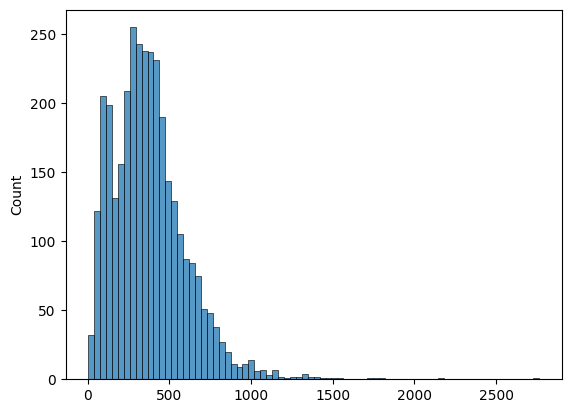

In [222]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(lengths_of_texts)
plt.show()

In [223]:
## Get sequences for train and test input data
X_train_seq = tokenizer.texts_to_sequences(X_train_texts)
X_test_seq = tokenizer.texts_to_sequences(X_test_texts)

In [224]:
## Padding 
from tensorflow.keras.preprocessing.sequence import pad_sequences

## For length to pad till, we use the average length of all texts 
avg_length_text = int(np.mean(lengths_of_texts))

X_train_pad = pad_sequences(X_train_seq, maxlen=avg_length_text, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=avg_length_text, padding='post', truncating='post')

In [225]:
## Check results of padding 
print(X_train_pad.shape)
print(X_test_pad.shape)

(2678, 376)
(670, 376)


RNN

In [226]:
from tensorflow.keras.layers import SimpleRNN, Embedding, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping


from keras.layers import Dropout

model_rnn = Sequential([
    Embedding(input_dim = len(word_index), output_dim = 8, 
             input_length=avg_length_text), ## recall that we set the post-padding length to be this value 
    SimpleRNN(16), ## THIS IS THE RECURRENT LAYER 
    Dropout(0.2),
    Dense(8, activation='relu'),
    Dropout(0.2), 
    Dense(1, activation= 'sigmoid') ## final layer for prediction, hence only one node
])

## compile -- add optim, add loss, add metrics 
model_rnn.compile(optimizer = 'adam', loss = ['binary_crossentropy'], metrics = ['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history_rnn = model_rnn.fit(X_train_pad, y_train, epochs=100, validation_data=(X_test_pad, y_test), callbacks=[early_stopping])

Epoch 1/100
84/84 [==============================] - 15s 130ms/step - loss: 0.6868 - accuracy: 0.5590 - val_loss: 0.6814 - val_accuracy: 0.5731
Epoch 2/100
84/84 [==============================] - 9s 109ms/step - loss: 0.6671 - accuracy: 0.6057 - val_loss: 0.6771 - val_accuracy: 0.5687
Epoch 3/100
84/84 [==============================] - 10s 114ms/step - loss: 0.6344 - accuracy: 0.6598 - val_loss: 0.6807 - val_accuracy: 0.5806
Epoch 4/100
84/84 [==============================] - 10s 123ms/step - loss: 0.6146 - accuracy: 0.6889 - val_loss: 0.6817 - val_accuracy: 0.5925
Epoch 5/100
84/84 [==============================] - 9s 111ms/step - loss: 0.5548 - accuracy: 0.7319 - val_loss: 0.6966 - val_accuracy: 0.5567
Epoch 6/100
84/84 [==============================] - 9s 109ms/step - loss: 0.4955 - accuracy: 0.7681 - val_loss: 0.7230 - val_accuracy: 0.5552
Epoch 7/100
84/84 [==============================] - 9s 109ms/step - loss: 0.4292 - accuracy: 0.7961 - val_loss: 0.7782 - val_accuracy: 0.5

In [227]:
## Test set 
loss, accuracy = model_rnn.evaluate(X_test_pad, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

21/21 [==============================] - 1s 37ms/step - loss: 0.6771 - accuracy: 0.5687
Test Loss: 0.6770897507667542
Test Accuracy: 0.5686567425727844


LSTM

In [228]:
from tensorflow.keras.layers import LSTM


model_lstm = Sequential([
    Embedding(input_dim=len(word_index) + 1, output_dim=8, input_length=avg_length_text),
    LSTM(16),  # 16 LSTM units
    Dropout(0.2),
    Dense(8, activation='relu'),  
    Dropout(0.2),  # Adding dropout
    Dense(1, activation='sigmoid')
])

model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history_lstm = model_lstm.fit(X_train_pad, y_train, epochs=50, 
                              validation_data=(X_test_pad, y_test), callbacks=[early_stopping])

Epoch 1/50
84/84 [==============================] - 36s 289ms/step - loss: 0.6827 - accuracy: 0.5773 - val_loss: 0.6753 - val_accuracy: 0.5731
Epoch 2/50
84/84 [==============================] - 21s 251ms/step - loss: 0.6761 - accuracy: 0.5822 - val_loss: 0.6716 - val_accuracy: 0.5731
Epoch 3/50
84/84 [==============================] - 22s 266ms/step - loss: 0.6641 - accuracy: 0.6449 - val_loss: 0.6547 - val_accuracy: 0.6418
Epoch 4/50
84/84 [==============================] - 25s 295ms/step - loss: 0.6031 - accuracy: 0.7087 - val_loss: 0.6038 - val_accuracy: 0.6910
Epoch 5/50
84/84 [==============================] - 22s 257ms/step - loss: 0.5223 - accuracy: 0.7644 - val_loss: 0.6157 - val_accuracy: 0.6612
Epoch 6/50
84/84 [==============================] - 24s 284ms/step - loss: 0.4511 - accuracy: 0.7894 - val_loss: 0.6120 - val_accuracy: 0.6881
Epoch 7/50
84/84 [==============================] - 24s 287ms/step - loss: 0.4097 - accuracy: 0.7931 - val_loss: 0.6762 - val_accuracy: 0.6761

In [229]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

## Test set 
loss, accuracy = model_lstm.evaluate(X_test_pad, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

 3/21 [===>..........................] - ETA: 1s - loss: 0.5483 - accuracy: 0.7604

21/21 [==============================] - 2s 76ms/step - loss: 0.6038 - accuracy: 0.6910
Test Loss: 0.6038157939910889
Test Accuracy: 0.6910447478294373
